                                        productTitle originalPrice    price  \
0  Dresser For Bedroom With 9 Fabric Drawers Ward...           NaN   $46.79   
1  Outdoor Conversation Set 4 Pieces Patio Furnit...           NaN  $169.72   
2  Desser For Bedroom With 7 Fabric Drawers Organ...         $78.4   $39.46   
3  Modern Accent Boucle Chair,Upholstered Tufted ...           NaN  $111.99   
4  Small Unit Simple Computer Desk Household Wood...        $48.82   $21.37   

   sold        tagText  
0   600  Free shipping  
1     0  Free shipping  
2     7  Free shipping  
3     0  Free shipping  
4     1  Free shipping  
  productTitle   price  sold tagText
0          543   46.79   600       1
1         1242  169.72     0       1
2          503   39.46     7       1
3         1054  111.99     0       1
4         1509   21.37     1       1


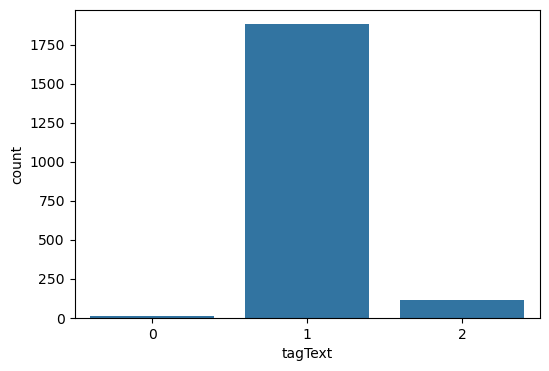

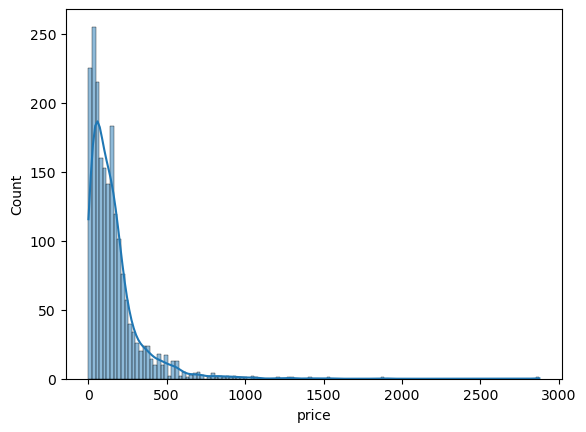

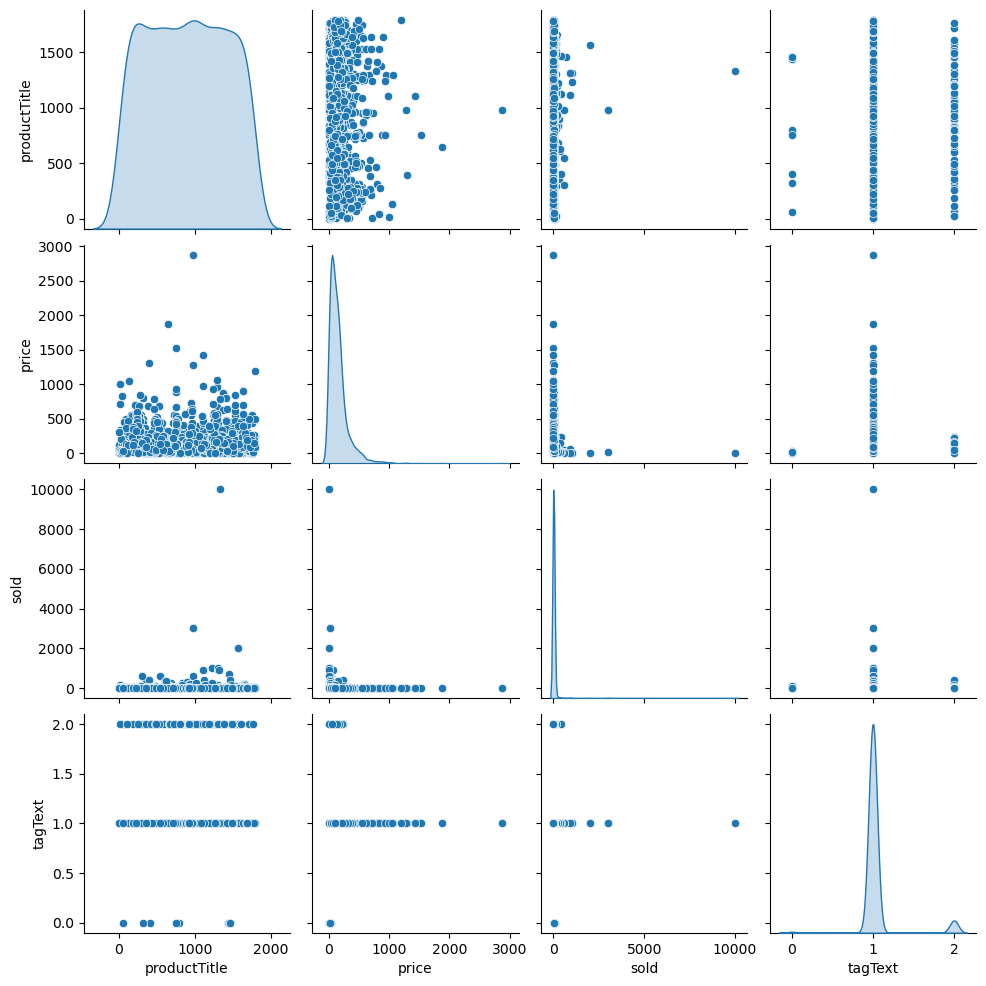

Mean Absolute Error: 25.732023988095236
Mean Squared Error: 7555.816929395647
R² Score: -0.3779138841031635


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('ecommerce_furniture_dataset_2024.csv')

# Display dataset info
#print(df.info())

# Display first few rows
print(df.head())

# Handle missing values
if 'originalPrice' in df.columns:
    df.drop(columns=['originalPrice'], inplace=True)  # Remove 'originalPrice' if it exists

df.loc[:, 'tagText'] = df['tagText'].fillna("Unknown")  # Safe assignment

# Convert 'price' column to numeric (remove '$' and ',')
df.loc[:, 'price'] = df['price'].astype(str).str.replace(r'[\$,]', '', regex=True).astype(float)

# Group rare 'tagText' values
df.loc[:, 'tagText'] = df['tagText'].apply(lambda x: x if x in ['Free shipping', '+Shipping: $5.09'] else 'others')

# Encode categorical variables
le = LabelEncoder()
df.loc[:, 'productTitle'] = le.fit_transform(df['productTitle'])
df.loc[:, 'tagText'] = le.fit_transform(df['tagText'])

# Display updated dataset
print(df.head())

# Data Visualization
plt.figure(figsize=(6,4))
sns.countplot(x='tagText', data=df)
plt.show()

sns.histplot(df['price'], kde=True)
plt.show()

sns.pairplot(df, diag_kind="kde")
plt.show()

# Define Features (X) and Target (y)
X = df[['productTitle', 'price', 'tagText']]  # Independent Variables
y = df['sold']  # Target Variable

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

# Print Evaluation Metrics
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
